No. of stocks in Portfolio -  3
No. of stocks in Watchlist -  2
Extracting information for Portfolio Stocks
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INFY&apikey=8F2RGPNPOLZKRID1
Extracting data for Symbol -  INFY
Error occurred for symbol -  INFY
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=VEDL&apikey=8F2RGPNPOLZKRID1
Extracting data for Symbol -  VEDL
Error occurred for symbol -  VEDL
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&apikey=8F2RGPNPOLZKRID1
Extracting data for Symbol -  AAPL
Error occurred for symbol -  AAPL
Extracting information for WatchList Stocks
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GOOG&apikey=8F2RGPNPOLZKRID1
Extracting data for Symbol -  GOOG
Error occurred for symbol -  GOOG
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&apikey=8F2RGPNPOLZKRID1
Extracting data for Symbol -  MSFT
Error o

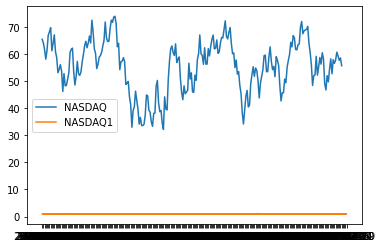

Plotting for symbol -  NASDAQ
Plotting for symbol -  NASDAQ1


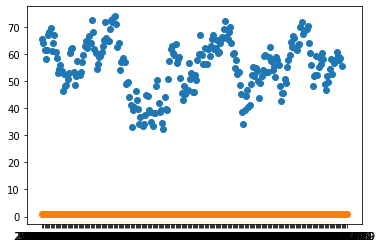

           Date  IDX_CLOSE  IDX_OPEN  IDX_HIGH   IDX_LOW        RSI  SYMBOL
4    2022-11-08   10616.20  10611.53  10745.64  10472.73  65.551403  NASDAQ
5    2022-11-07   10564.52  10516.94  10587.96  10428.91  64.164471  NASDAQ
6    2022-11-04   10475.25  10548.14  10553.63  10262.93  61.734673  NASDAQ
7    2022-11-03   10342.94  10399.45  10486.01  10319.54  58.215918  NASDAQ
8    2022-11-02   10524.80  10885.01  10993.24  10522.90  61.466958  NASDAQ
..          ...        ...       ...       ...       ...        ...     ...
247  2021-11-19   16057.44  16042.16  16121.12  16017.23  60.796266  NASDAQ
248  2021-11-18   15993.71  15973.39  16010.88  15848.83  59.393603  NASDAQ
249  2021-11-17   15921.57  15973.62  15998.57  15909.39  57.768852  NASDAQ
250  2021-11-16   15973.86  15840.32  15989.61  15825.00  58.651792  NASDAQ
251  2021-11-15   15853.85  15894.82  15918.45  15778.31  55.769875  NASDAQ

[248 rows x 7 columns]


KeyError: 'Date'

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests as req
import json
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def readFile(fileName):
    df= pd.read_csv(fileName)
    return df

def getStockHistory(symbol,history=60):
    url ="https://www.alphavantage.co/query"
    apikey="PDECX17E90TYRIZM"
    apikey="8F2RGPNPOLZKRID1"
    url ="https://www.alphavantage.co/query?"
    url = url + "function=TIME_SERIES_DAILY_ADJUSTED"
    url = url + "&symbol=" + symbol
    url = url + "&apikey=" + apikey
    
    print(url)
    resp=req.get(url)
    if resp.status_code==200:
        try:
            result=resp.json()
            print("Extracting data for Symbol - ",symbol)
            df=pd.DataFrame.from_dict(result["Time Series (Daily)"],orient='index')
            df=df.drop(['1. open','2. high','3. low'],axis=1)
            df=df.drop(['5. adjusted close','7. dividend amount','8. split coefficient'],axis=1)
            df.rename(columns = {'4. close':'CLOSE_PRICE', '6. volume':'VOLUME'}, inplace = True)
            df = df.reset_index()
            df.rename(columns = {'index':'Date'}, inplace = True)
            df["CLOSE_PRICE"] = portfolioStocks["CLOSE_PRICE"].apply(pd.to_numeric)
            df=df.assign(SYMBOL=symbol)
            
            df.to_csv("Dataset/" + symbol + ".csv")
        except:
            print("Error occurred for symbol - ",symbol)
            df=pd.DataFrame()
        
        
        return df
    else:
        return null

def createStockListDataFrame(dataFrame):
    stockDataFrame=pd.DataFrame()
    for symbol in dataFrame['SYMBOL']:
        df=getStockHistory(symbol)
        if len(df)>0:
            stockDataFrame=stockDataFrame.append(df,ignore_index=True)
    
    return stockDataFrame

def plotChart(dataFrame):
    sns.set_theme(style="whitegrid")

    values = dataFrame['RSI']
    dates = dataFrame['Date']
    data = pd.DataFrame(values, dates, columns=["SYMBOL"])
    data = data.rolling(7).mean()

    sns.lineplot(data=data, palette="tab10", linewidth=2.5)

def matPlotChart(dataFrame):
    for symbol in dataFrame['SYMBOL'].unique():
        print("Plotting for symbol - ",symbol)
        df1=dataFrame[(dataFrame['SYMBOL']==symbol)]
        plt.plot(df1['Date'],df1['RSI'],label=symbol )
    
    plt.legend()
    plt.show()

def scatterPlot(dataFrame):
    fig, ax = plt.subplots()
    for symbol in dataFrame['SYMBOL'].unique():
        print("Plotting for symbol - ",symbol)
        df1=dataFrame[(dataFrame['SYMBOL']==symbol)]
        ax.scatter(df1['Date'],df1['RSI'],label=symbol )
    
    plt.show()

def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]


        
if __name__ == '__main__':

    df_port=readFile("DataSet/Portfolio.csv")
    df_wl=readFile("DataSet/WatchList.csv")

    print("No. of stocks in Portfolio - ",len(df_port) )
    print("No. of stocks in Watchlist - ",len(df_wl) )

    print("Extracting information for Portfolio Stocks")
    portfolioStocks=createStockListDataFrame(df_port)
    portfolioStocks['STOCK_TYPE']="Portfolio"
    
    print("Extracting information for WatchList Stocks")
    WLStocks=createStockListDataFrame(df_wl)
    WLStocks['STOCK_TYPE']="WatchList"
    
    print("Reading NASDAQ Data - ")
    idxHistory = readFile("DataSet/NASDAQ Data.csv")
    idxHistory.rename(columns = {'Close/Last':'IDX_CLOSE','Open':'IDX_OPEN','High':'IDX_HIGH','Low':'IDX_LOW'},inplace = True)
    idxHistory['RSI']=idxHistory['IDX_CLOSE']/idxHistory['IDX_OPEN']
    idxHistory['SYMBOL']='NASDAQ'
    
    idxHistory1=idxHistory[:]
    idxHistory1['SYMBOL']='NASDAQ1'
    
    idxHistory['RSI'] = get_rsi(idxHistory['IDX_CLOSE'], 14)
    idxHistory = idxHistory.dropna()

    matPlotChart(idxHistory.append(idxHistory1,ignore_index=True))
    
    scatterPlot(idxHistory.append(idxHistory1,ignore_index=True))
    
    print(idxHistory)
    
    allStocks = portfolioStocks.append(WLStocks,ignore_index=True)
    allStocks=pd.merge(allStocks, idxHistory, on=['Date'])      
    allStocks.dropna(inplace=True)
    allStocks['RSI']=allStocks['CLOSE_PRICE']/allStocks['IDX_CLOSE']*100

    